In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Numpy (https://numpy.org/) is used for array manipulation
# and matrix/vector operations. Moreover hunder the hood make
# use of C and Fortran which dramatically improve performances.

# Matplotlib (https://matplotlib.org/) is a popular plotting
# library which smootly integrate with Jupyer Notebook

# This very file is a "jupyter notebook file" (or simply a "notebook").
# These files have ".ipynb" as extention and can be open with
# "Jupyter Notebook Interface" (https://github.com/jupyter/notebook)
# (there are other interfaces like JupyterLab but the Notebook is simpler)
# A notebook is a collection of "cell" in which you can write and run code
# (code type cell) or write plain text for documenting the code.

In [2]:
def plot(x, y, title):
    plt.figure(figsize=(9, 7))  # make the plot bigger
    plt.plot(x, y)              # place point on the plot
    plt.title(title)            # set plot title
    plt.show()                  # show the plot

# Harmonic oscillator

$$
\dot{\vec{x}} = F(\vec{x})
\qquad
\Longleftrightarrow
\qquad
\begin{cases}
    \dot{x} &= y \\
    \dot{y} &= - \omega^2 \,x
\end{cases}
\qquad \text{where} \qquad \vec{x} = (x,y) \in \mathbb{R}^2
$$

In [3]:
# Fixing constants (omega)
w = 1.2


def F(x):
    """
    RHS of the differential eq for harmonic oscillator.

    Args:
        x: staus of the system at time i

    Return:
        Evaluation of the RHS of the equation, i.e. dx/dt
    """
    return np.array([x[1], -w * w * x[0]])

### Euler method

$$
\vec{x}_{i+1} = \vec{x}_i + F(\vec{x}_i) \, dt
$$

In [4]:
def Euler(x, F, dt):
    """
    Euler method for integration.

    Args:
        x: status of the system at timestep i
        F: RHS of the differential equation
        dt: timestep length

    Returns:
        Status of the system at timestep i + 1.
    """
    return x + F(x) * dt

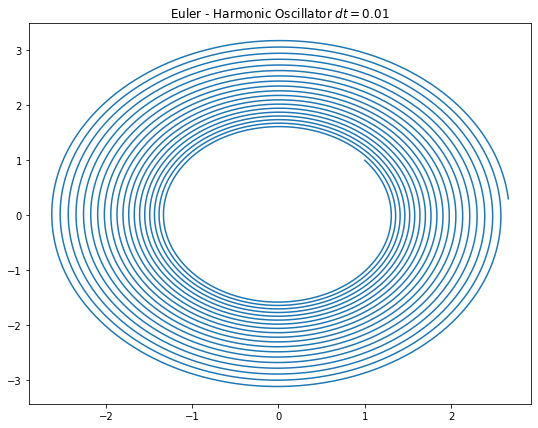

In [5]:
# Number of iteration (N), timestep length(dt), physical time (t)
N = 10_000
dt = 0.01
t = N * dt

# N x 2 matrix where store the evolution of the system.
# Each row contains the (x, y) of the system at different time.
X = np.empty(N * 2).reshape(N, 2)

# Fixing inital conditions
X[0], X[1] = 1.0, 1.0

# Integration
for i in range(0, N - 1):
    X[i + 1] = Euler(X[i], F, dt)

# Plot results
plot(X[:, 0], X[:, 1], f"Euler - Harmonic Oscillator $dt = {dt}$")

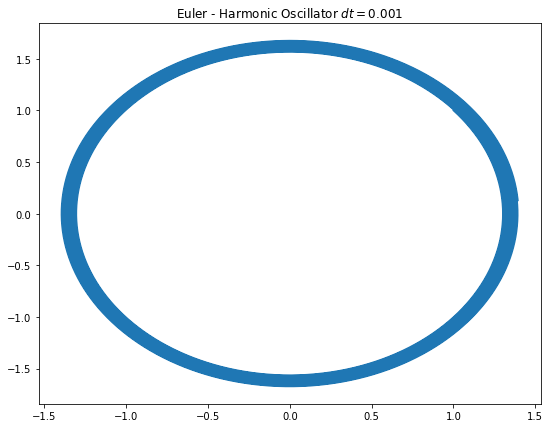

In [6]:
N = 100_000
dt = 0.001
t = N * dt

X = np.empty(N * 2).reshape(N, 2)
X[0], X[1] = 1.0, 1.0

for i in range(0, N - 1):
    X[i + 1] = Euler(X[i], F, dt)

plot(X[:, 0], X[:, 1], f"Euler - Harmonic Oscillator $dt = {dt}$")

### Runge-Kutta 2nd order

$$
\begin{cases}
    \vec{x}_i'    &= \vec{x}_i + F(\vec{x}_i)  \ \delta t \, / \, 2 \\
    \vec{x}_{i+1} &= \vec{x}_i + F(\vec{x}_i') \ \delta t
\end{cases}
$$


In [7]:
def RK2(x, F, dt):
    """
    Runge-Kutta 2nd order method for integration.

    Args:
        x: status of the system at timestep i
        F: RHS of the differential equation
        dt: timestep length

    Returns:
        Status of the system at timestep i + 1.
    """
    return x + F(x + F(x) * dt / 2) * dt

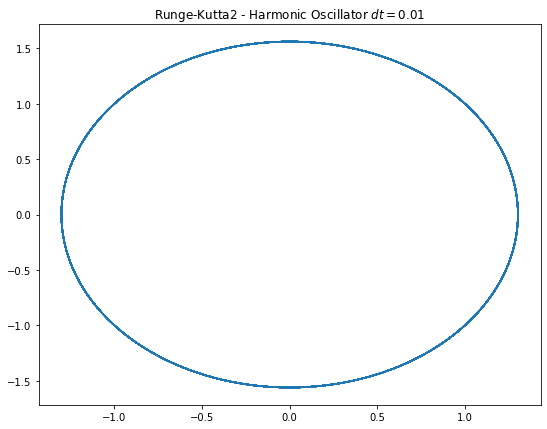

In [8]:
N = 10_000
dt = 0.01
t = N * dt

X = np.empty(N * 2).reshape(N, 2)
X[0], X[1] = 1.0, 1.0

for i in range(0, N - 1):
    X[i + 1] = RK2(X[i], F, dt)

plot(X[:, 0], X[:, 1], f"Runge-Kutta2 - Harmonic Oscillator $dt = {dt}$")